<a href="https://colab.research.google.com/github/jeetsarkar19/Chingu_bot/blob/main/BreastCancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
#import libraries
import pandas as pd
import seaborn as sb 

# Download dataset from Kaggle

In [2]:
import os 
os.environ['KAGGLE_USERNAME']='jeetsarkar21'
os.environ['KAGGLE_KEY']='7d1117d8a8abc1dd19c6768a782a418b'

In [3]:
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 77.3MB/s]


In [4]:
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [5]:
dataframe = pd.read_csv('/content/data.csv')

In [6]:
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
dataframe.shape

(569, 33)

In [8]:
dataframe.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
dataframe.dropna(axis=1,inplace=True)

In [10]:
dataframe.shape

(569, 32)

In [11]:

dataframe['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Label Encoding

In [12]:
dataframe.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [29]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataframe.iloc[:,1]=label.fit_transform(dataframe.iloc[:,1].values)
#dataframe.iloc[:,1]
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Split Dataset & Feature Scaling

In [30]:
X = dataframe.iloc[:,2:].values
Y = dataframe.iloc[:,1].values

In [31]:
#Splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [32]:
#Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [33]:
X_train

array([[-0.25052743,  1.43406073, -0.31460213, ..., -0.82564795,
        -0.7248161 , -0.89700171],
       [-1.57132982, -1.72847536, -1.55772189, ..., -1.06904209,
         0.49345339,  0.38260319],
       [-0.64458215, -0.04852492, -0.67341929, ..., -0.68630251,
        -0.58195202, -0.20802767],
       ...,
       [-1.81811737,  1.26724047, -1.8258949 , ..., -1.74720016,
        -0.05445389, -0.75348928],
       [-1.00987375,  0.25222146, -0.89731452, ...,  0.5010496 ,
        -0.48461606,  2.08302544],
       [-0.17861964, -0.09316696, -0.17508533, ...,  0.44273322,
         0.961294  ,  0.17619686]])

# Build a Logistic Regression Model

In [34]:
#build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
#make use of trained model to make predictions on test data
predictions = classifier.predict(X_test)


# Performance Evaluation

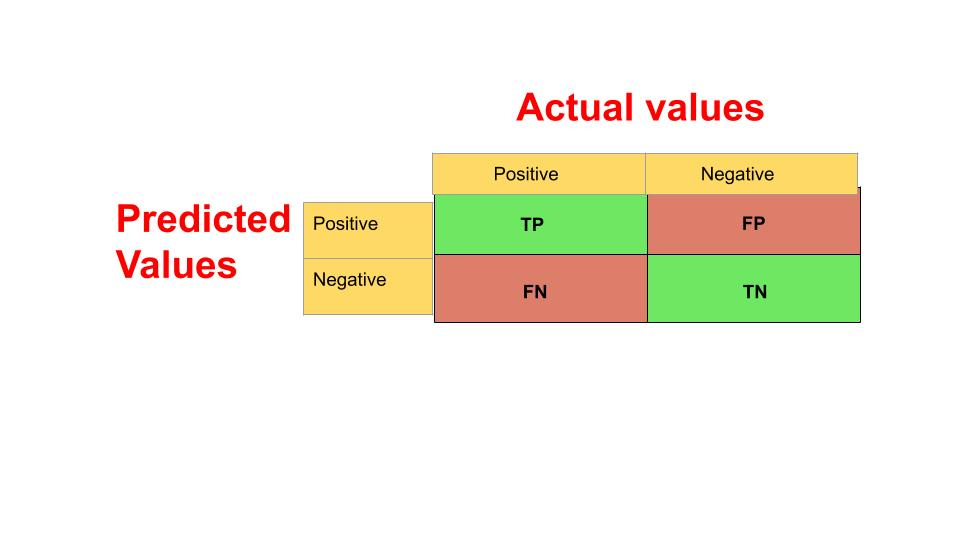

[[88  0]
 [ 4 51]]


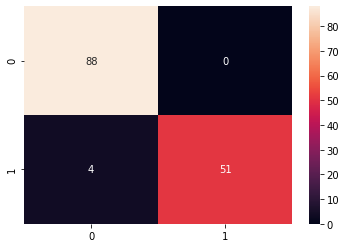

In [37]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
confusematrix = confusion_matrix(Y_test,predictions)
print(confusematrix)
sb.heatmap(confusematrix,annot=True)

In [38]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.972027972027972


In [39]:
print(Y_test)

[0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0
 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0]


In [41]:
print(predictions)

[0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0
 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0]
